# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will three classification technique (logistic regression, decision trees and random forest) that are representative of methods and challenges you will encounter when using any classification method.


## Dataset
The dataset you will be using is "Income". 

There are two data files: "income.csv" and "income_Xtest.csv"<br/>
Both files have the following fields, except income which is not available in "income_Xtest.csv"

Features:

1. age: continuous.<br>
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.<br>
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. education-num: continuous.<br>
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. sex: Female, Male.<br>
11. capital-gain: continuous.<br>
12. capital-loss: continuous.<br>
13. hours-per-week: continuous.<br>
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

Target: 

income: whether a person makes over 50K a year.


Training dataset, "income.csv", contains 3706 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "income_Xtest.csv", contains 1000 rows and 14 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether a person makes over 50K a year. (If you transfrom the target as binary values, please make sure >50 is 1, <=50 is 0)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load your training data set and test data
T = pd.read_csv("income.csv")
TT = pd.read_csv("income_Xtest.csv")
# Clean the dataset: remove the rows with " ?"
columns = T.columns[:].tolist()
Tcolumns = TT.columns[:].tolist()
for x in columns:
    T = T[~T[x].isin([' ?'])]

for x in Tcolumns:
    TT = TT[~TT[x].isin([' ?'])]

In [4]:
# Split data into X and y

#input
X = T.iloc[:, :-1] 
  
#output 
y = T.iloc[:, -1]

### Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables into dummy variables

In [5]:
from sklearn.preprocessing import OneHotEncoder
#training set
cols = T.columns

num_cols = T._get_numeric_data().columns

cate = list(set(cols) - set(num_cols))
for x in range(len(cate)):
    if cate[x] == 'income':
        name = cate[0]
        cate[0] = cate[x]
        cate[x] = name
label = T[cate]
enc = OneHotEncoder(categories='auto')
encoded = enc.fit_transform(label).toarray()

new_columns = list()
for col, values in zip(label.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value) for value in values])

coded_T = T.drop(columns = cate)
coded_T = pd.concat([pd.DataFrame(encoded, columns = new_columns), coded_T],axis = 'columns')


X = coded_T.iloc[:,2:]
y = coded_T.iloc[:,0:2]

#testing set
Tcols = TT.columns
Tnum_cols = TT._get_numeric_data().columns
        
Tcate = list(set(Tcols) - set(Tnum_cols))
Tlabel = TT[Tcate]
Tenc = OneHotEncoder(categories='auto')
Tencoded = Tenc.fit_transform(Tlabel).toarray()

Tnew_columns = list()
for col, values in zip(Tlabel.columns, Tenc.categories_):
    Tnew_columns.extend([col + '_' + str(value) for value in values])

X_test = TT.drop(columns = Tcate)
X_test = pd.concat([pd.DataFrame(Tencoded, columns = Tnew_columns), X_test],axis = 'columns')

#clean invaid value
coded_T.dropna(inplace = True)
X_test.dropna(inplace = True)


X = coded_T.iloc[:,2:]
y = coded_T.iloc[:,0:1]
#1 if smaller than 50k, 0 if larger than 50k

test_columns = list(X_test.columns)
train_columns = list(X.columns)
unused_columns = []
for x in train_columns:
    if x not in test_columns:
        unused_columns.append(x)

used_columns = set(train_columns) - set(unused_columns)
X = X[list(used_columns)]

#### Splitting training data into training and validation set (the code has been provided)

In [6]:
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,:]

Print the shape of your X_train, X_val, X_test

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
#where is X_test coming from

(2800, 89)
(341, 89)
(855, 89)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [8]:
from sklearn.linear_model import LogisticRegression
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# predict the output for validation dataset
y_pred = classifier.predict(X_val)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Implement precision(), recall(), accuracy() by yourselves

In [10]:
def precision(y, y_preds):
    """
    Return precision, which is TP/(TP+FP)
    """
    y = y.values
    TP = 0
    FP = 0
    for x in range(len(y)):
        if y_preds[x] == 1:
            if y[x] == 1:
                TP += 1
            else:
                FP += 1
    TP = TP / len(y)
    FP = FP / len(y)
    return(TP / (TP + FP))

def recall(y, y_preds):
    """
    Return recall, which is TP/(TP+FN)
    """
    y = y.values
    TP = 0
    FN = 0
    for x in range(len(y)):
        if y_preds[x] == 1:
            if y[x] == 1:
                TP += 1
        else:
            if y[x] == 1:
                FN += 1
    TP = TP / len(y)
    FN = FN / len(y)
    return(TP/(TP+FN))


def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    y = y.values
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in range(len(y)):
        if y_preds[x] == 1:
            if y[x] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if y[x] == 1:
                FN += 1
            else:
                TN += 1
    TP = TP / len(y)
    FN = FN / len(y)
    TN = TN / len(y)
    FP = FP / len(y)
    return((TP+TN)/(TP+FP+FN+TN))

Use your above functions to print precision, recall, and accuracy of your model:

In [11]:
# Using the predictions to calculate accuracy, precision, recall
print(precision(y_val, y_pred))
print(recall(y_val, y_pred))
print(accuracy(y_val, y_pred))

0.6832844574780058
1.0
0.6832844574780058


Q1. Accuracy<br>
Ans - 0.6832844574780058

Q2. Precision<br>
Ans - 0.6832844574780058

Q3. Recall<br>
Ans - 1.0

Q4. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans - 

Q5. Which metric is suitable in this case? <br>
Ans - 

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions.

In [12]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_score = classifier.decision_function(X_val)
fpr, tpr, _ = metrics.roc_curve(y_val, y_score)

# method I: plt
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
auc = np.trapz(tpr, fpr)
print(auc)

0.5826975043713241


Q6. What is the AUC obtained?<br>
Ans - 0.5826975043713241

### Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

Build a logistic regression model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [13]:
HM1 = LogisticRegression(C = 0.1, penalty = 'l1')
HM1.fit(X_train, y_train)
y_pred1 = HM1.predict(X_val)
print ("Accuracy : ", accuracy(y_val, y_pred1)) 
print ("Precision : ", precision(y_val, y_pred1))
print ("recall : ", recall(y_val, y_pred1))

Accuracy :  0.6832844574780058
Precision :  0.6843657817109144
recall :  0.9957081545064378


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [14]:
HM2 = LogisticRegression(C = 0.5, penalty = 'l1')
HM2.fit(X_train, y_train)
y_pred2 = HM1.predict(X_val)
print ("Accuracy : ", accuracy(y_val, y_pred2)) 
print ("Precision : ", precision(y_val, y_pred2))
print ("recall : ", recall(y_val, y_pred2))

Accuracy :  0.6832844574780058
Precision :  0.6843657817109144
recall :  0.9957081545064378


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 


In [15]:
HM3 = LogisticRegression(C = 0.1, penalty = 'l2')
HM3.fit(X_train, y_train)
y_pred3 = HM1.predict(X_val)
print ("Accuracy : ", accuracy(y_val, y_pred3)) 
print ("Precision : ", precision(y_val, y_pred3))
print ("recall : ", recall(y_val, y_pred3))

Accuracy :  0.6832844574780058
Precision :  0.6843657817109144
recall :  0.9957081545064378


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 

In [16]:
HM4 = LogisticRegression(C = 0.5, penalty = 'l2')
HM4.fit(X_train, y_train)
y_pred4 = HM4.predict(X_val)
print ("Accuracy : ", accuracy(y_val, y_pred4)) 
print ("Precision : ", precision(y_val, y_pred4))
print ("recall : ", recall(y_val, y_pred4))

Accuracy :  0.6832844574780058
Precision :  0.6832844574780058
recall :  1.0


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q7. Which of the above models is better? <br>
Ans- HM4

### Test set

You have worked on training and validation dataset so far, but testing data does not include the labels. Choose the best hyperparameter values from the four models as seen in the previous section. Use this logistic model to make predictions on test set. 


In [17]:
# Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###

# return the prediction as "y_pred"
y_pred = HM4.predict(X_test)

## Dataset 2
The dataset you will be using in the following parts is "Wine". 

There are two data files: "wine.csv" and "wine_Xtest.csv"<br/>
Both files have the following fields, except quality which is not available in "wine_Xtest.csv"

Features: <br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>

Target:<br>
12 - quality ('good' and 'bad')<br>

Training dataset, "wine.csv", contains 1000 rows and 12 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "wine_Xtest.csv", contains 300 rows and 11 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether the quality is good. (If you transfrom the target as binary values, please make sure "good" is 1, "bad" is 0)

In [18]:
# Load your training data set and test data
W = pd.read_csv("wine.csv")
WW = pd.read_csv("wine_Xtest.csv")

In [19]:
# Split data into X and y
X = W[W.columns[:-1]]
y = W[W.columns[-1:]]
#y.loc[df.Weight == "155", "Name"] = "John"

In [20]:
y.head()

,quality
0,bad
1,bad
2,bad
3,good
4,bad


### Skewness of data:
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. <br>

If tail is on the right of data, it is right skewed data. It is also called positively skewed data.<br>
Common transformations of this data include square root, cube root, and log.

If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.<br>
Common transformations include square, cube and exponentiation.

Plot a histogram of X to understand the distributions of the continuous values.<br/>

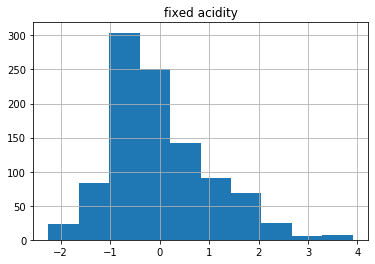

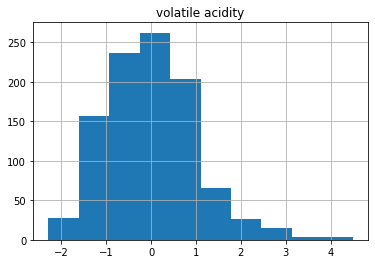

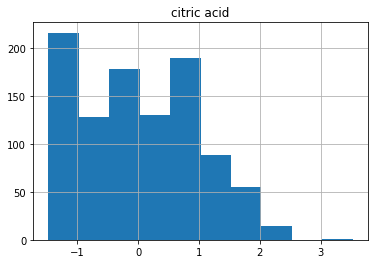

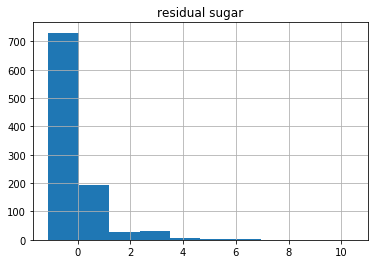

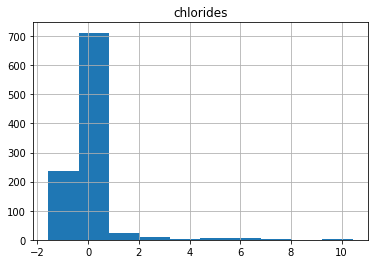

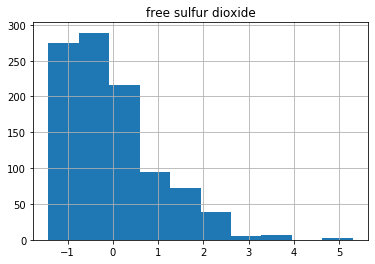

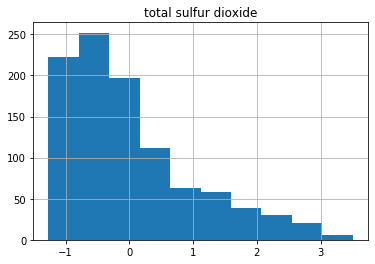

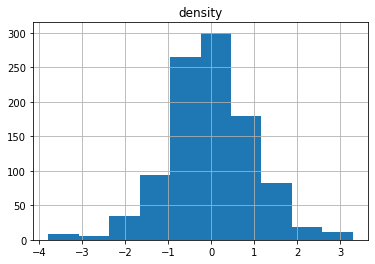

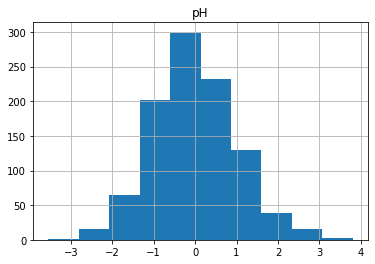

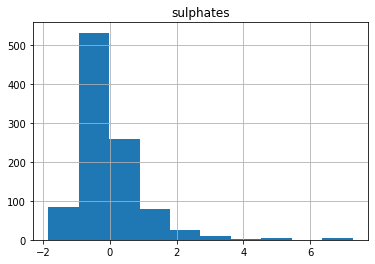

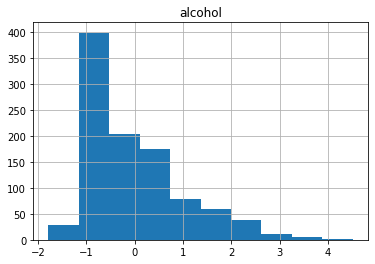

In [34]:
for x in list(X.columns):
    X.hist(column = x)

Q8. According to the above histogram, can you see any skewed features? Which features are skewed? Are they left-skewed or right-skewed? <br>
Ans - most features are right - skewed.

Perform transformations on the skewed features so that the distribution of these features becomes closer to a normal distribution.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
alco = X[X.columns[-1]]
alco = scaler.fit_transform(np.array(alco).reshape(-1, 1))

Plot the histogram of the transformed X to see if your transformations are successful

(array([ 29., 399., 204., 174.,  78.,  60.,  38.,  12.,   5.,   1.]),
 array([-1.78251179, -1.15305959, -0.52360739,  0.10584481,  0.73529701,
         1.36474921,  1.99420141,  2.62365361,  3.2531058 ,  3.882558  ,
         4.5120102 ]),
 <a list of 10 Patch objects>)

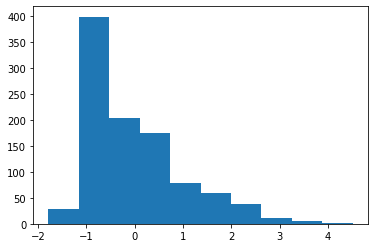

In [23]:
plt.hist(alco)

Standardize the transformed X

In [24]:
for x in X.columns:
    X[x] = scaler.fit_transform(np.array(X[x]).reshape(-1, 1))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anacond

Splitting training data into training and validation set (the code has been provided)

In [25]:
len(X)

1000

In [26]:
y.head()

,quality
0,bad
1,bad
2,bad
3,good
4,bad


In [36]:
y.loc[y.quality == "good", "quality"] = 1
y.loc[y.quality == "bad", "quality"] = 0
X_train = X.iloc[:700,:]
y_train = y.iloc[:700,:]
X_val = X.iloc[700:,:]
y_val = y.iloc[700:,:]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [28]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=20
clf = RandomForestClassifier(random_state = 20)
clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [29]:
### Make predictions on the training data
y_pred = clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the training data. 

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
print("Accuracy: ", accuracy_score(y_val, y_pred)) 
print ("Precision : ", precision_score(y_val, y_pred))
print ("recall : ", recall(y_val, y_pred))

Accuracy:  0.7166666666666667
Precision :  0.7302631578947368
recall :  0.7161290322580646


In [31]:
### Make predictions on the validation data
for x in WW.columns:
    WW[x] = scaler.fit_transform(np.array(WW[x]).reshape(-1, 1))
y_pred2 = clf.predict(WW)

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [32]:
print("Accuracy: ", accuracy_score(y_val, y_pred2)) 
print ("Precision : ", precision_score(y_val, y_pred2))
print ("recall : ", recall(y_val, y_pred2))

Accuracy:  0.5033333333333333
Precision :  0.5194805194805194
recall :  0.5161290322580646


Plot ROC curve and obtain AUC for validation predictions

0.5028921023359288


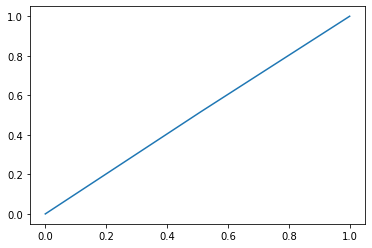

In [40]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_auc_score
y_score = roc_auc_score(y_val, y_pred2)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred2)

plt.plot(fpr, tpr)
auc = np.trapz(tpr, fpr)
print(auc)

Q9. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.<br>

Ans - The data is likely to have high variance and low bias because the validation accuracy is much lower than the the training accuracy.

## Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [45]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=20

clf = RandomForestClassifier(random_state=20)

In [52]:
### Make predictions on the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Print accuracy, prediction and recall for the predictions made on the training data. 

In [53]:
print("Accuracy: ", accuracy_score(y_train, y_pred)) 
print ("Precision : ", precision_score(y_train, y_pred))
print ("recall : ", recall(y_train, y_pred))

Accuracy:  0.99
Precision :  0.9882697947214076
recall :  0.9911764705882353


In [54]:
### Make predictions on the validation data
y_pred2 = clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [55]:
print("Accuracy: ", accuracy_score(y_val, y_pred2)) 
print ("Precision : ", precision_score(y_val, y_pred2))
print ("recall : ", recall(y_val, y_pred2))

Accuracy:  0.7166666666666667
Precision :  0.7302631578947368
recall :  0.7161290322580646


Plot ROC curve and obtain AUC for the validation predictions

0.7166852057842047


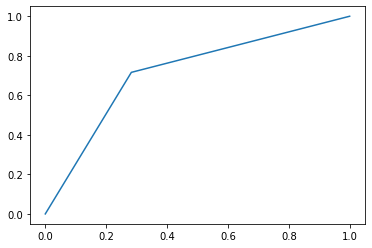

In [56]:
# Plot the ROC curve by giving appropriate names for title and axes. 
y_score = roc_auc_score(y_val, y_pred2)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred2)

plt.plot(fpr, tpr)
auc = np.trapz(tpr, fpr)
print(auc)

Q10. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. <br>

Ans - The model is still too overfitted for the validation set since it gets a nearly perfect score but only 0.71 in the validation set.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [3,5,20,None],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [1,5,10],
    'min_samples_split': [2,6,12],
    'n_estimators': [10,50,100,150]
}

In [65]:
rf = RandomForestClassifier(random_state=20)

In [66]:
# We use f1_score in this question
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 

In [67]:
# Fit the training data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 563 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 849 out of 864 | elapsed:   15.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   15.2s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=20,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [68]:
# Print the best parameters
best = grid_search.best_params_
best['random_state'] = 20
best

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 10,
 'random_state': 20}

In [69]:
# Print the best score
grid_search.best_score_

0.6964637771866686

In [80]:
# Using the best model, do the following:
# Make predictions on the training set and display accuracy, precision and recall.
brf = RandomForestClassifier(**best)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_train)
print("training set:")
print("Accuracy: ", accuracy_score(y_train, y_pred)) 
print ("Precision : ", precision_score(y_train, y_pred))
print ("recall : ", recall(y_train, y_pred))
# Make predictions on the validation set and display accuracy, precision and recall. 
print(" ")
print("Validation set: ")
y_pred2 = brf.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred2)) 
print ("Precision : ", precision_score(y_val, y_pred2))
print ("recall : ", recall(y_val, y_pred2))

training set:
Accuracy:  0.78
Precision :  0.7924528301886793
recall :  0.7411764705882353
 
Validation set: 
Accuracy:  0.7666666666666667
Precision :  0.7931034482758621
recall :  0.7419354838709677


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7675194660734149


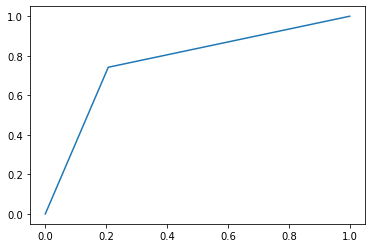

In [81]:
# Using the best model, plot the ROC curve by giving appropriate names for title and axes. 
y_score = roc_auc_score(y_val, y_pred2)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred2)

plt.plot(fpr, tpr)
auc = np.trapz(tpr, fpr)
print(auc)

### Test
Choose the best hyperparameter values from the previous section. Use this random forest model to make predictions on test set. 

In [82]:
# Construct your final random forest using the best hyperparameters obtained above

# return the prediction as "y_pred2"
y_pred2 = brf.predict(WW)

In [ ]:
#end